# Introducción

Ilustracion del proceso de inferencia

## Proceso de aprendizaje normal-normal

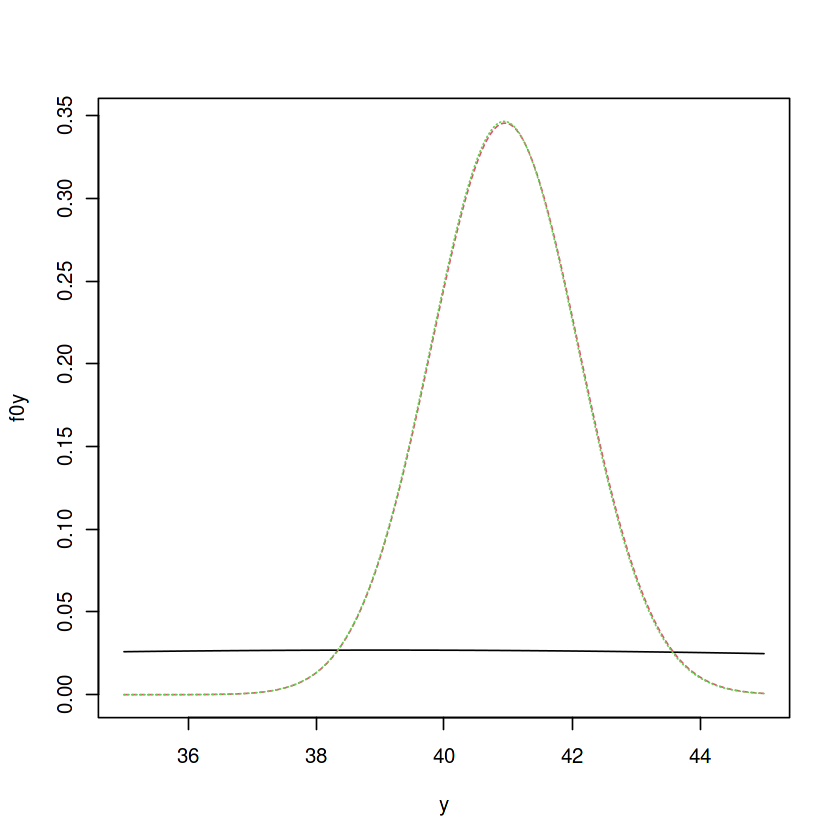

In [1]:
#muestra
xbar<-40.9533
sig2<-4
n<-3

# distribción a priori
th0<-39
sig20<-219.47

y<-seq(35,45,length.out=200)
f0y<-dnorm(y,th0,sqrt(sig20))

# distribción a posteriori

liky<-dnorm(y,xbar,sqrt(sig2/n))
sig21<-1/(n/sig2+1/sig20)
th1<-sig21*(n/sig2*xbar+th0/sig20)
f1y<-dnorm(y,th1,sqrt(sig21))

#graficamos
ymax<-max(f0y,liky,f1y)
plot(y,f0y,ylim=c(0,ymax),type="l")
lines(y,liky,lty=2,col=2)
lines(y,f1y,lty=3,col=3)


## Proceso de aprendizaje bernoulli-beta

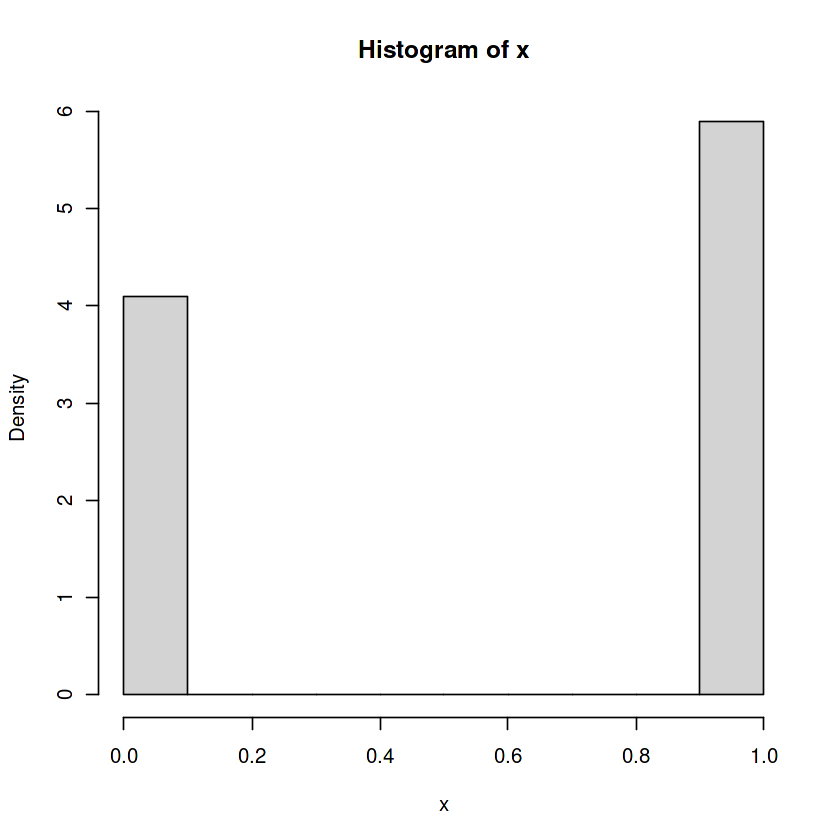

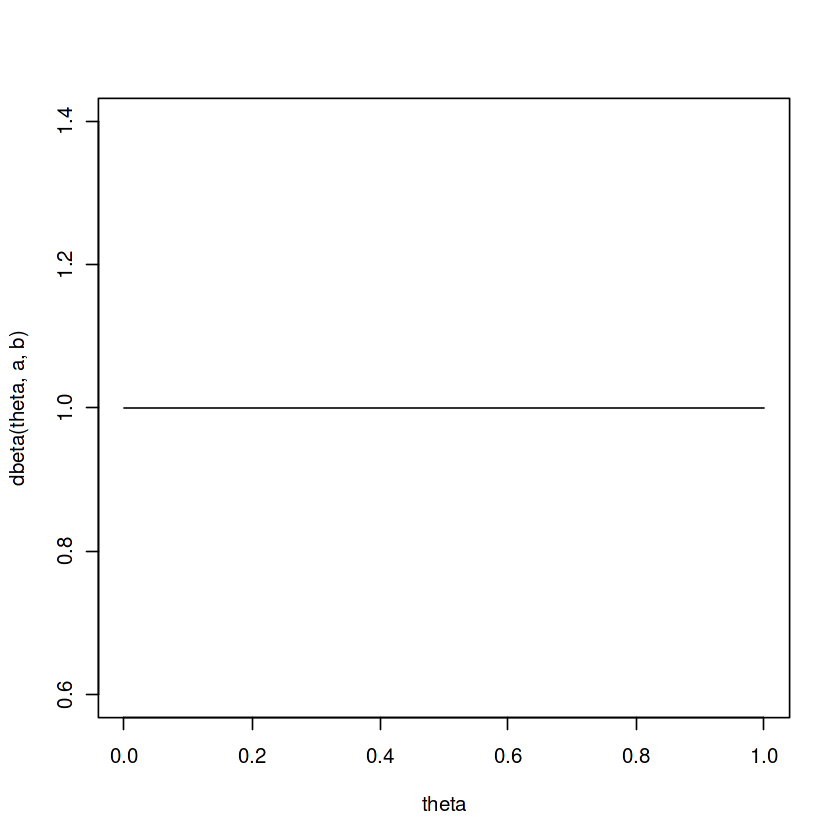

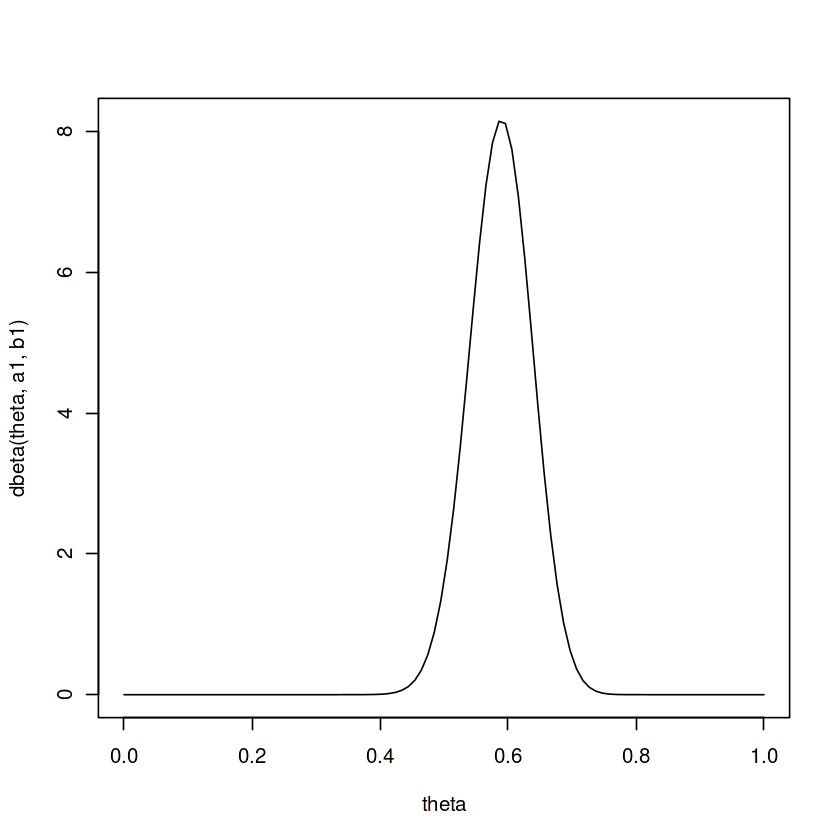

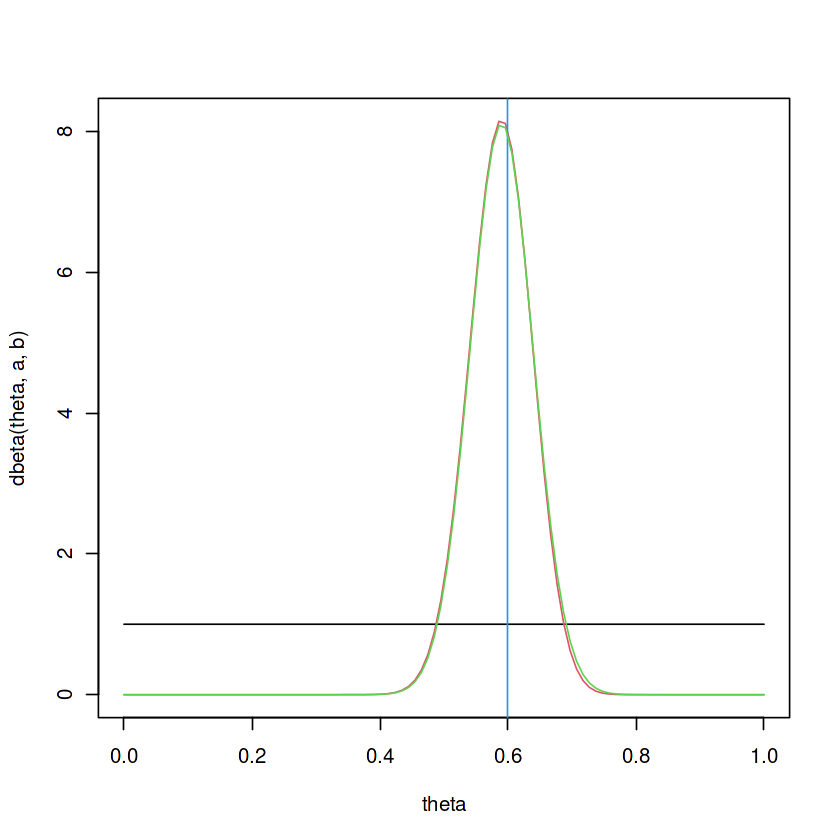

In [2]:
#Simulacion de datos Bernoulli
theta0 <- 0.6
n <- 100
x<-rbinom(n,1,theta0)
hist(x,freq=FALSE)

#Distribucion inicial para theta
a <- 1
b <- 1
theta<-seq(0,1,,100)
plot(theta,dbeta(theta,a,b),type="l")

#Distribucion final
a1 <- a + sum(x)
b1 <- b + n - sum(x)
plot(theta,dbeta(theta,a1,b1),type="l")

#Ambas
theta<-seq(0,1,,100)
ymax <- max(dbeta(theta,a,b),dbeta(theta,a1,b1))
plot(theta,dbeta(theta,a,b),type="l",ylim=c(0,ymax))
lines(theta,dbeta(theta,a1,b1),col=2)
abline(v=theta0,col=4)

#Aproximacion normal asintotica
mu <- (a1-1)/(a1+b1-2)
sig2 <- (a1-1)*(b1-1)/(a1+b1-2)^3
lines(theta,dnorm(theta,mu,sqrt(sig2)),col=3)

## Aproximación Monte Carlo

[1] 16.252813  2.738015
[1] 13.895678  1.152443
[1] 14.8497732  0.4186186
[1] 14.806683  1.086217


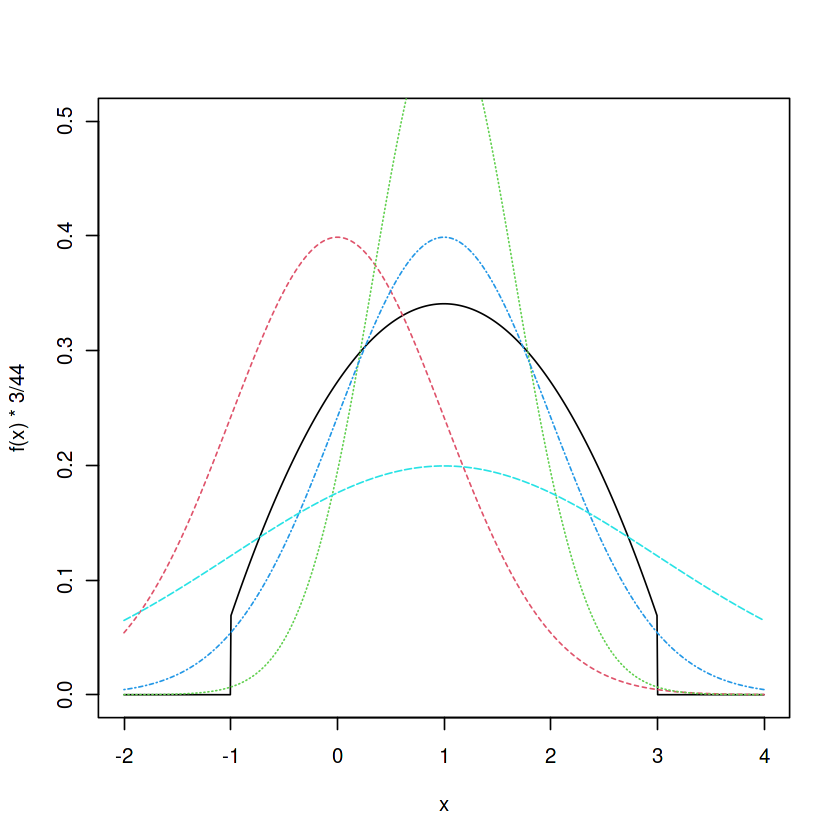

In [3]:
#-Ejemplo 1-
x<-seq(-2,4,,1000)
f<-function(x){
  out <- 5-(x-1)^2
  out <- ifelse (x < -1 | x>3,0,out)
  out
}
plot(x,f(x)*3/44,type="l",ylim=c(0,0.5))
lines(x,dnorm(x,0,1),lty=2,col=2)
lines(x,dnorm(x,1,2/3),lty=3,col=3)
lines(x,dnorm(x,1,1),lty=4,col=4)
lines(x,dnorm(x,1,2),lty=5,col=5)

N<-100

#Caso 1: S=Normal estandar
mu<-0
sig<-1
y<-rnorm(N,mu,sig)
I1<-mean(f(y)/dnorm(y,mu,sig))
eI1<-sd(f(y)/dnorm(y,0,1))/sqrt(N)
print(c(I1,eI1))

#Caso 2: S=Normal no estandar
mu<-1
sig<-2/3
y<-rnorm(N,mu,sig)
I2<-mean(f(y)/dnorm(y,mu,sig))
eI2<-sd(f(y)/dnorm(y,mu,sig))/sqrt(N)
print(c(I2,eI2))

#Caso 3: S=Normal no estandar
mu<-1
sig<-1
y<-rnorm(N,mu,sig)
I3<-mean(f(y)/dnorm(y,mu,sig))
eI3<-sd(f(y)/dnorm(y,mu,sig))/sqrt(N)
print(c(I3,eI3))

#Caso 4: S=Normal no estandar
mu<-1
sig<-2
y<-rnorm(N,mu,sig)
I4<-mean(f(y)/dnorm(y,mu,sig))
eI4<-sd(f(y)/dnorm(y,mu,sig))/sqrt(N)
print(c(I4,eI4))



[1] 0.50748176 0.02910402
[1] 0.45410760 0.06693061
[1] 0.5177537 0.0472592


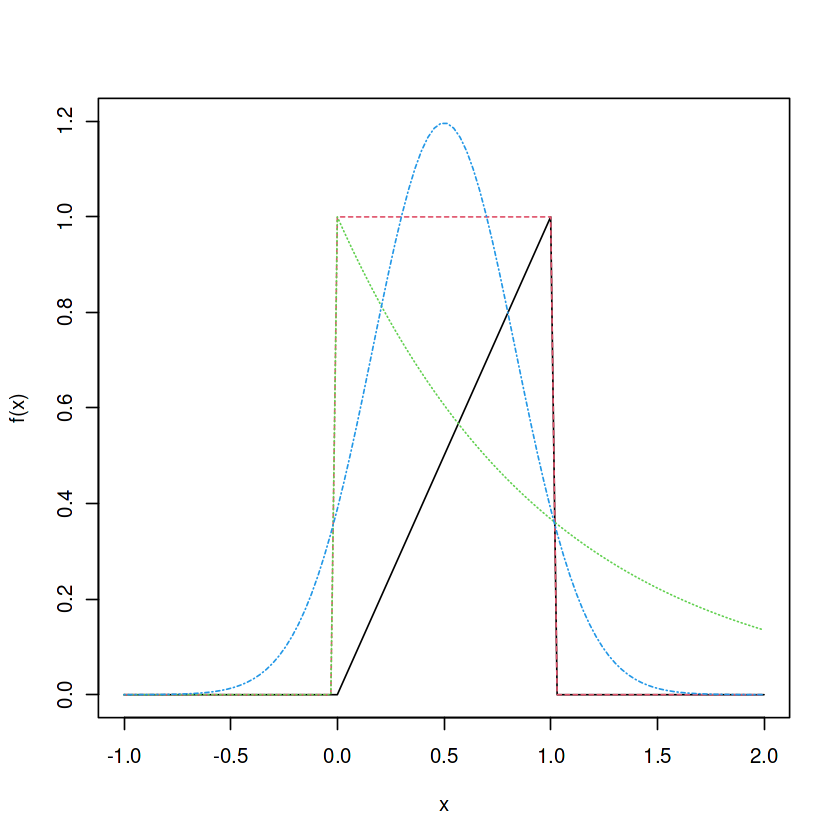

In [4]:
#-Ejemplo 2-
f<-function(x){
  out<-ifelse(x<0,0,x)
  out<-ifelse(x>1,0,out)
  out
}
x<-seq(-1,2,,100)
plot(x,f(x),type="l",ylim=c(0,1.2))
lines(x,dunif(x,0,1),col=2,lty=2)
lines(x,dexp(x,1),col=3,lty=3)
lines(x,dnorm(x,0.5,1/3),col=4,lty=4)

N<-100

#Caso 1: S=Uniforme
y<-runif(N,0,1)
I1<-mean(f(y)/dunif(y,0,1))
eI1<-sd(f(y)/dunif(y,0,1))/sqrt(N)
print(c(I1,eI1))

#Caso 2: S=Exponencial
y<-rexp(N,1)
I2<-mean(f(y)/dexp(y,1))
eI2<-sd(f(y)/dexp(y,1))/sqrt(N)
print(c(I2,eI2))

#Caso 3: S=Normal
y<-rnorm(N,0.5,1/3)
I3<-mean(f(y)/dnorm(y,0.5,1/3))
eI3<-sd(f(y)/dnorm(y,0.5,1/3))/sqrt(N)
print(c(I3,eI3))



In [5]:
#-Muestreador de Gibbs-
library(bayesm)
out<-rbiNormGibbs(rho=0.95)
out<-rbiNormGibbs(rho=-0.5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’




Bivariate Normal Gibbs Sampler
rho=  0.95
initial x,y coordinates= ( 2 , -2 )
burn-in=  100  R=  500
 
 


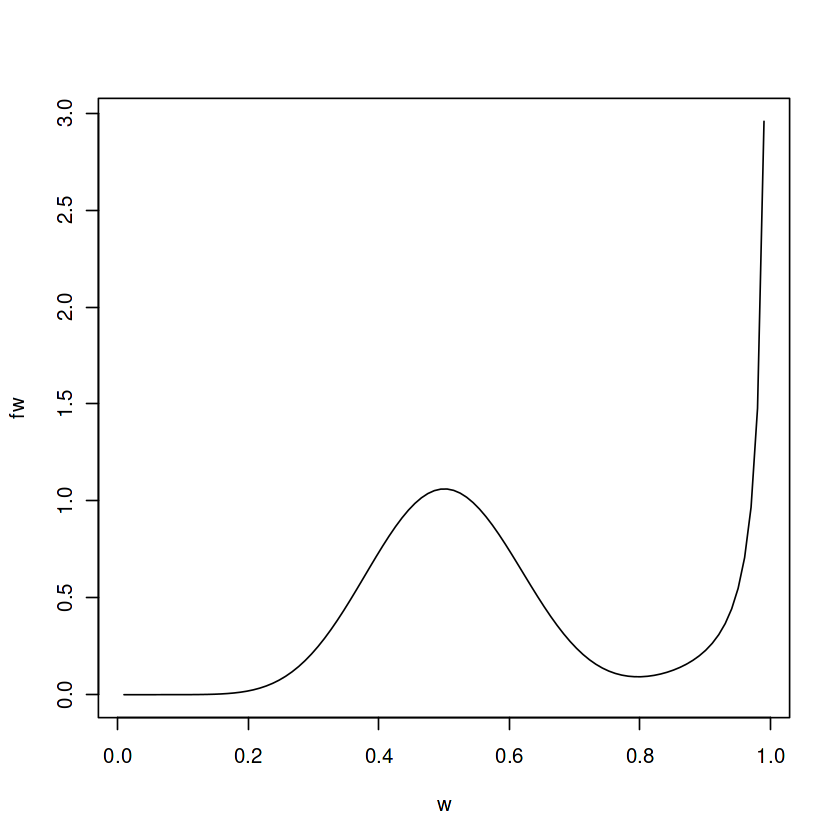

In [1]:
#---------------------#
#Mezcla de betas
w<-seq(0.01,0.99,,100)
pp<-0.3
fw<-pp*dbeta(w,10,10)+(1-pp)*dbeta(w,5,0.05)
par(mfrow=c(1,1))
plot(w,fw,type="l")